# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "CSIRO-Mk3-6-0"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-process/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/huss_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.7356698513031006 to load the data
*********Start to merge*********
It takes elapsed_time 0.041121721267700195 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_96x192_192x288_peri.nc
It takes elapsed_time 25.33293604850769 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.360829591751099 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6741421222686768 to mask the layer
*********Start to plot the layer*********


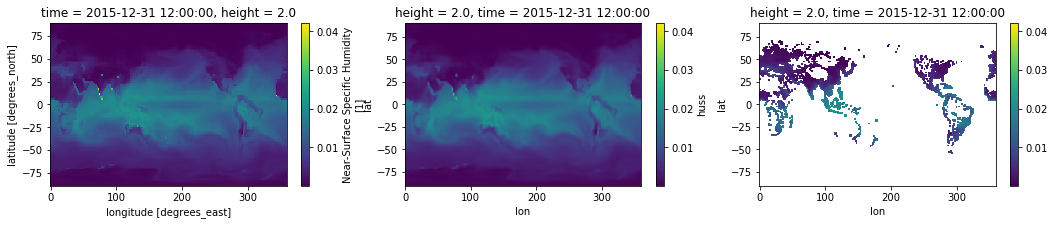

It takes elapsed_time 0.7079715728759766 to plot the layer
It takes elapsed_time 41.854013442993164 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/tas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.8821980953216553 to load the data
*********Start to merge*********
It takes elapsed_time 0.044824838638305664 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.10869145393371582 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.310642719268799 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6700851917266846 to mask the layer
*********Start to plot the layer*********


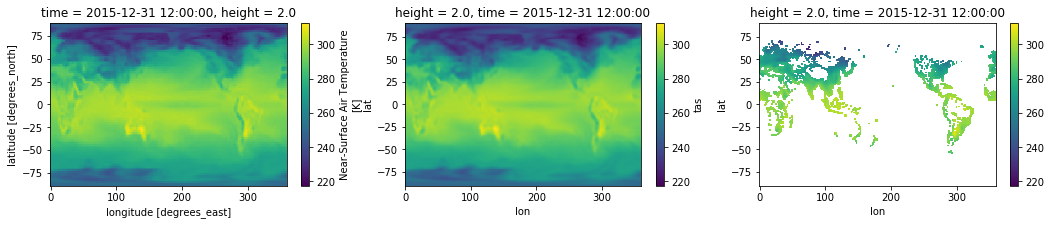

It takes elapsed_time 0.7279088497161865 to plot the layer
It takes elapsed_time 16.745720386505127 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/uas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 3.1686577796936035 to load the data
*********Start to merge*********
It takes elapsed_time 0.04257512092590332 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.08340597152709961 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.306520462036133 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6692135334014893 to mask the layer
*********Start to plot the layer*********


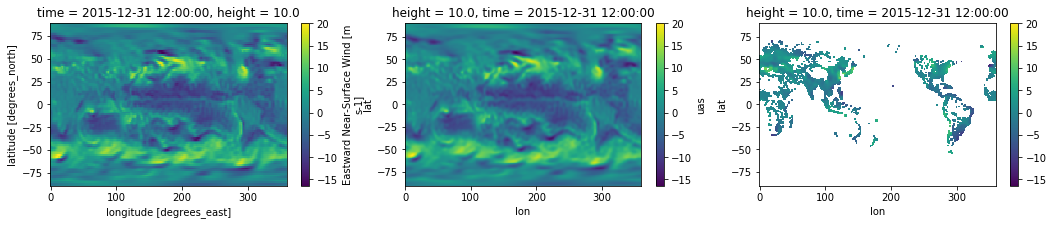

It takes elapsed_time 0.7557013034820557 to plot the layer
It takes elapsed_time 17.02672290802002 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/vas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 3.377584218978882 to load the data
*********Start to merge*********
It takes elapsed_time 0.045655012130737305 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.06987309455871582 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.096497774124146 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6838159561157227 to mask the layer
*********Start to plot the layer*********


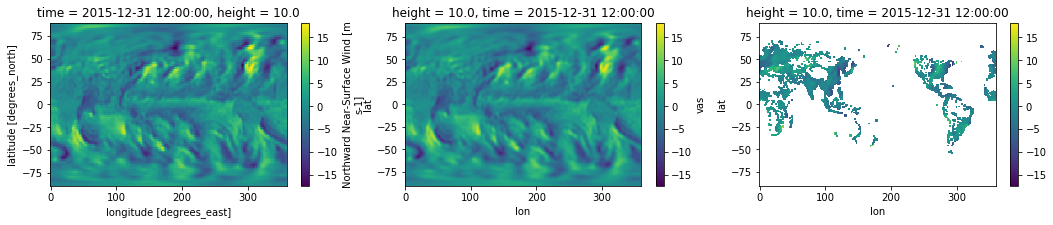

It takes elapsed_time 0.7385823726654053 to plot the layer
It takes elapsed_time 17.012996673583984 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/pr_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 3.0761256217956543 to load the data
*********Start to merge*********
It takes elapsed_time 0.04267764091491699 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.05355191230773926 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.070361614227295 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6525869369506836 to mask the layer
*********Start to plot the layer*********


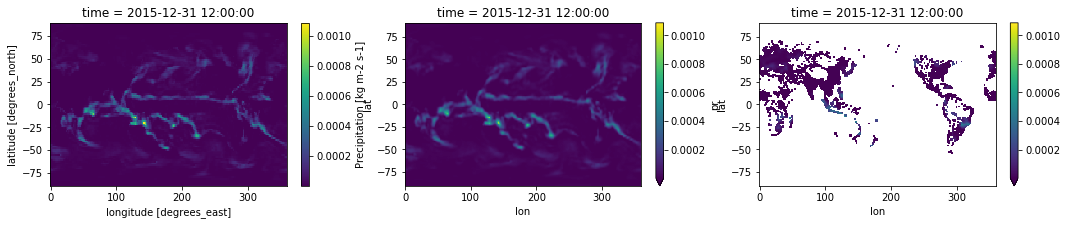

It takes elapsed_time 0.6524412631988525 to plot the layer
It takes elapsed_time 16.548409700393677 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/prsn_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.749920606613159 to load the data
*********Start to merge*********
It takes elapsed_time 0.04287552833557129 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.02936077117919922 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.035304546356201 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6620738506317139 to mask the layer
*********Start to plot the layer*********


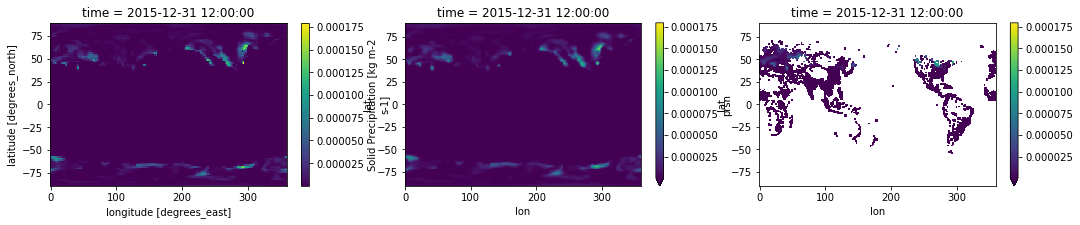

It takes elapsed_time 0.6800858974456787 to plot the layer
It takes elapsed_time 16.200475454330444 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rlds_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.8208084106445312 to load the data
*********Start to merge*********
It takes elapsed_time 0.04090142250061035 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.07188701629638672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.024301528930664 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6623139381408691 to mask the layer
*********Start to plot the layer*********


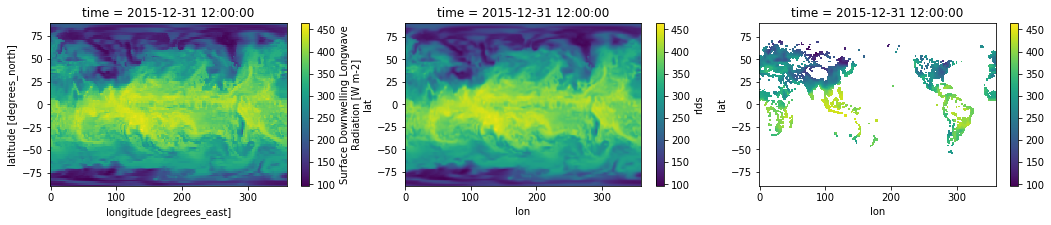

It takes elapsed_time 0.7107248306274414 to plot the layer
It takes elapsed_time 16.33178162574768 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rlus_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.6982364654541016 to load the data
*********Start to merge*********
It takes elapsed_time 0.0483708381652832 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.029492855072021484 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.056478261947632 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6519718170166016 to mask the layer
*********Start to plot the layer*********


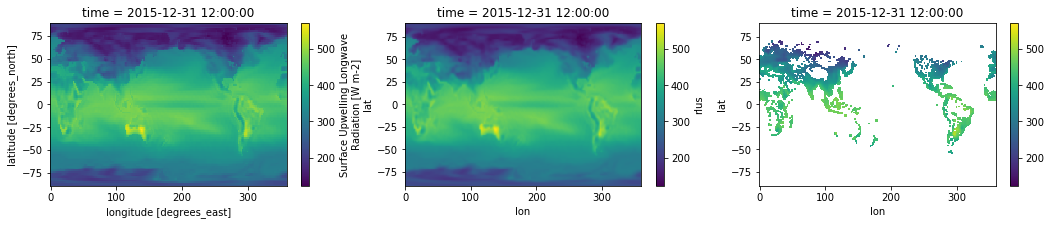

It takes elapsed_time 0.6686818599700928 to plot the layer
It takes elapsed_time 16.154117107391357 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rsds_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.8342325687408447 to load the data
*********Start to merge*********
It takes elapsed_time 0.04148101806640625 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.05515861511230469 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.050344705581665 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6594266891479492 to mask the layer
*********Start to plot the layer*********


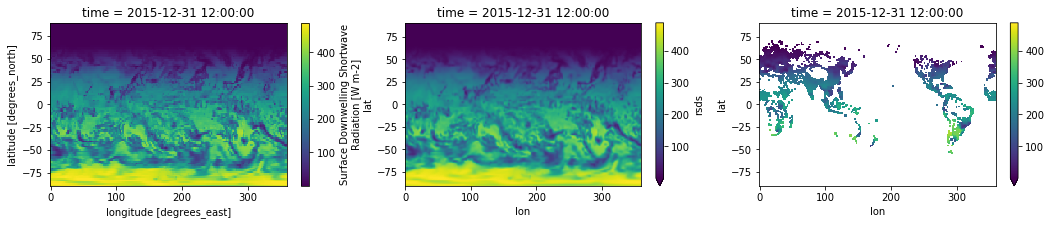

It takes elapsed_time 0.6879923343658447 to plot the layer
It takes elapsed_time 16.32927966117859 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rsus_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20060101-20251231.nc
It takes elapsed_time 2.967771530151367 to load the data
*********Start to merge*********
It takes elapsed_time 0.0411524772644043 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.0296478271484375 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 12.067761421203613 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6554148197174072 to mask the layer
*********Start to plot the layer*********


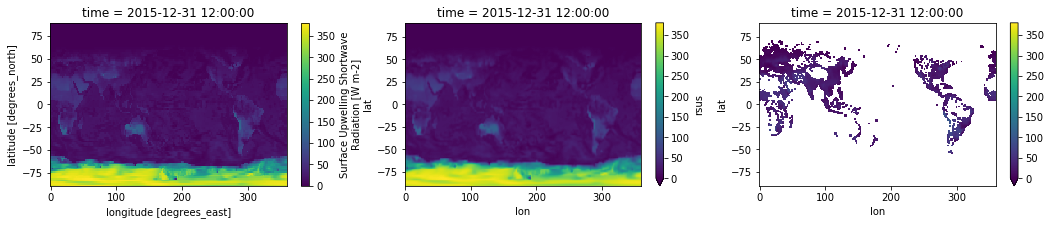

It takes elapsed_time 0.7002441883087158 to plot the layer
It takes elapsed_time 16.462740421295166 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2026, 20)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.592273473739624 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

276.3013288974762


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/huss_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 2.9134409427642822 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/huss_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 5.729114532470703 to load the data
*********Start to merge*********
It takes elapsed_time 6.706386566162109 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.07249116897583008 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.684373140335083 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6852662563323975 to mask the layer
*********Start to plot the layer*********


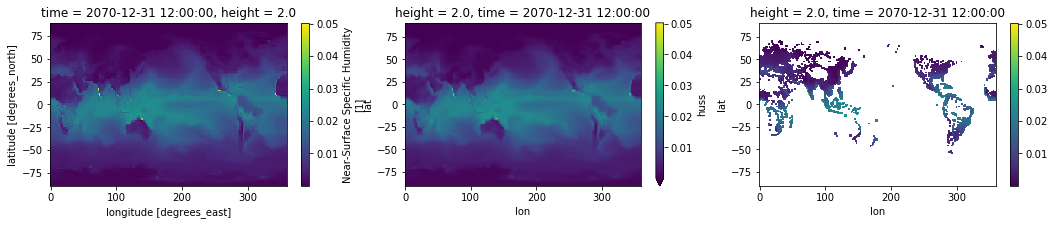

It takes elapsed_time 0.698493242263794 to plot the layer
It takes elapsed_time 25.577767610549927 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/tas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 2.7353663444519043 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/tas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 5.486319303512573 to load the data
*********Start to merge*********
It takes elapsed_time 6.661762714385986 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.07070803642272949 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.670264959335327 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6534557342529297 to mask the layer
*********Start to plot the layer*****

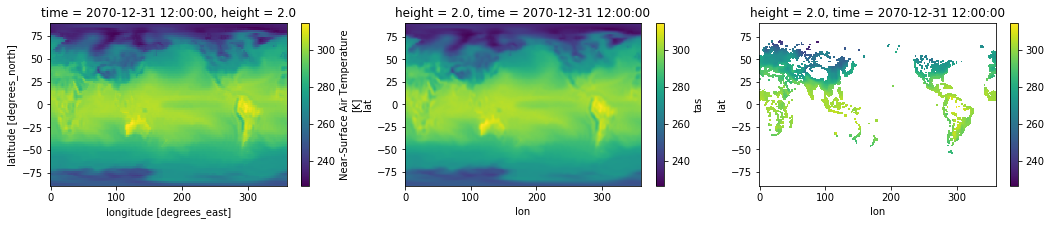

It takes elapsed_time 0.6922593116760254 to plot the layer
It takes elapsed_time 25.235630989074707 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/uas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.264697790145874 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/uas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.505920171737671 to load the data
*********Start to merge*********
It takes elapsed_time 6.727572202682495 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.06844115257263184 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.667987823486328 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6545200347900391 to mask the layer
*********Start to plot the layer*******

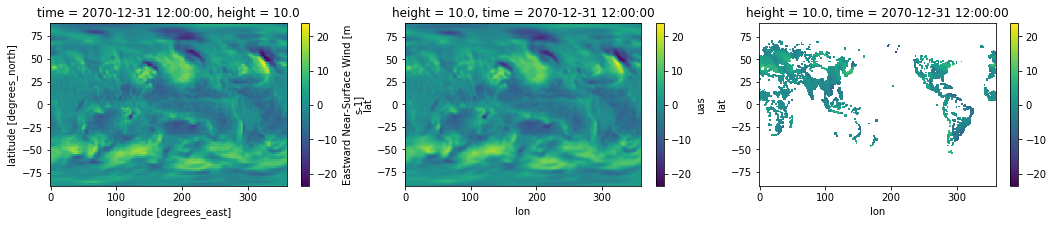

It takes elapsed_time 0.712517261505127 to plot the layer
It takes elapsed_time 26.33844542503357 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/vas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.360652208328247 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/vas_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.7003607749938965 to load the data
*********Start to merge*********
It takes elapsed_time 6.645809173583984 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.03093266487121582 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.662502765655518 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6542525291442871 to mask the layer
*********Start to plot the layer********

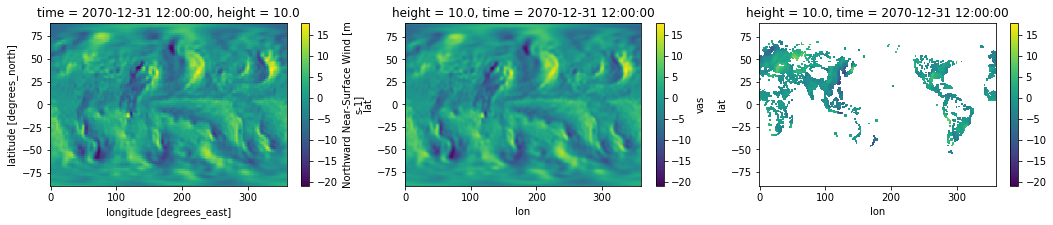

It takes elapsed_time 0.7398169040679932 to plot the layer
It takes elapsed_time 26.435993194580078 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/pr_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.3382914066314697 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/pr_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.384426116943359 to load the data
*********Start to merge*********
It takes elapsed_time 6.675377368927002 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.061542510986328125 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.661370515823364 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6545019149780273 to mask the layer
*********Start to plot the layer********

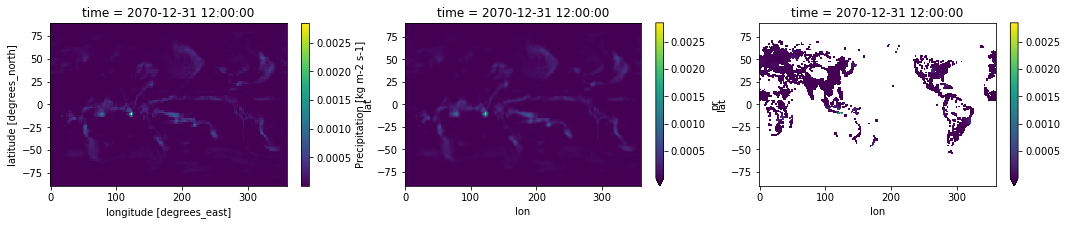

It takes elapsed_time 0.6708114147186279 to plot the layer
It takes elapsed_time 26.10885000228882 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/prsn_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.184741973876953 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/prsn_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.590043783187866 to load the data
*********Start to merge*********
It takes elapsed_time 6.811963081359863 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.1042318344116211 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.680841207504272 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6650636196136475 to mask the layer
*********Start to plot the layer********

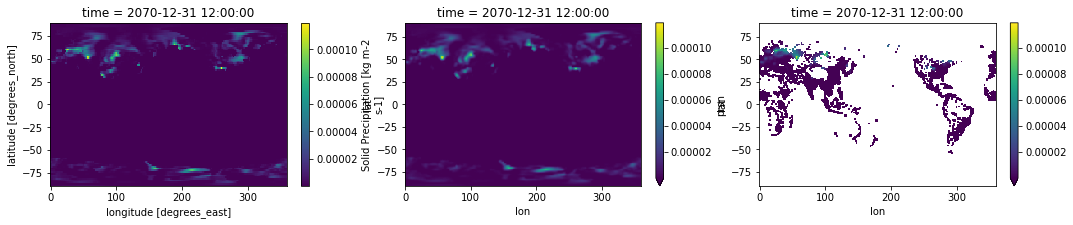

It takes elapsed_time 0.6873083114624023 to plot the layer
It takes elapsed_time 26.541240692138672 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rlds_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.5268499851226807 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rlds_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.660555124282837 to load the data
*********Start to merge*********
It takes elapsed_time 6.826797246932983 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.03297853469848633 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.699735164642334 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6698789596557617 to mask the layer
*********Start to plot the layer*

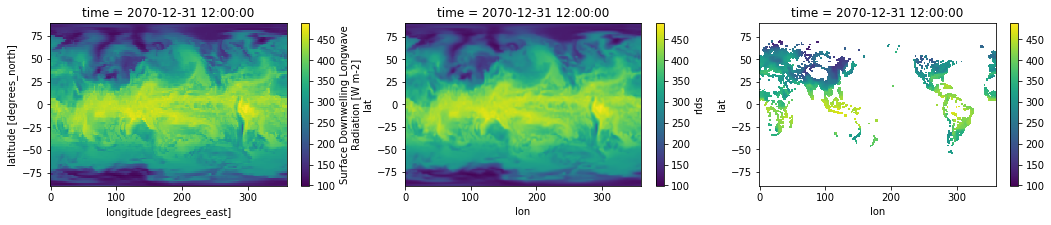

It takes elapsed_time 0.7472200393676758 to plot the layer
It takes elapsed_time 26.638562202453613 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rlus_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.0174508094787598 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rlus_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.22669243812561 to load the data
*********Start to merge*********
It takes elapsed_time 7.080840349197388 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.08399415016174316 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.616323709487915 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6939160823822021 to mask the layer
*********Start to plot the layer**

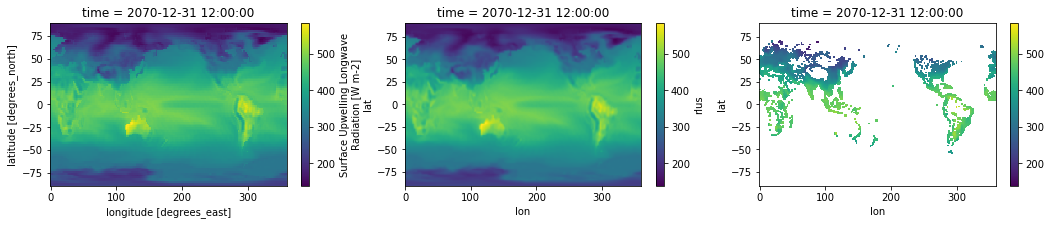

It takes elapsed_time 0.6972992420196533 to plot the layer
It takes elapsed_time 26.400232791900635 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rsds_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.0652987957000732 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rsds_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 7.232901573181152 to load the data
*********Start to merge*********
It takes elapsed_time 6.805377244949341 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.05482125282287598 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.746274948120117 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.660001277923584 to mask the layer
*********Start to plot the layer**

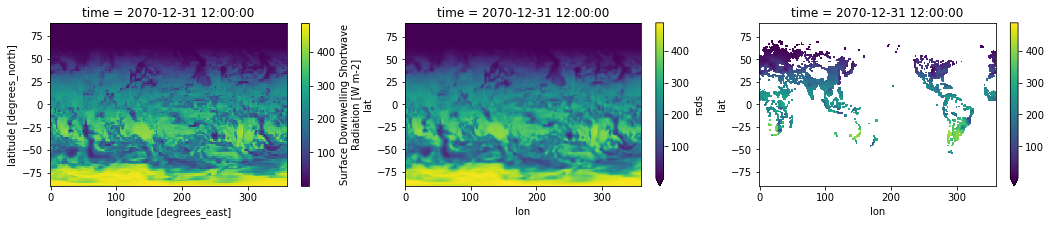

It takes elapsed_time 0.7012248039245605 to plot the layer
It takes elapsed_time 27.20140767097473 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rsus_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20460101-20651231.nc
It takes elapsed_time 3.486893653869629 to load the data
/glade/scratch/zhonghua/CMIP5/CSIRO-Mk3-6-0/rsus_day_CSIRO-Mk3-6-0_rcp85_r1i1p1_20660101-20851231.nc
It takes elapsed_time 6.795996189117432 to load the data
*********Start to merge*********
It takes elapsed_time 6.7383410930633545 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_96x192_192x288_peri.nc
It takes elapsed_time 0.06307339668273926 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.737011909484863 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6598458290100098 to mask the layer
*********Start to plot the layer**

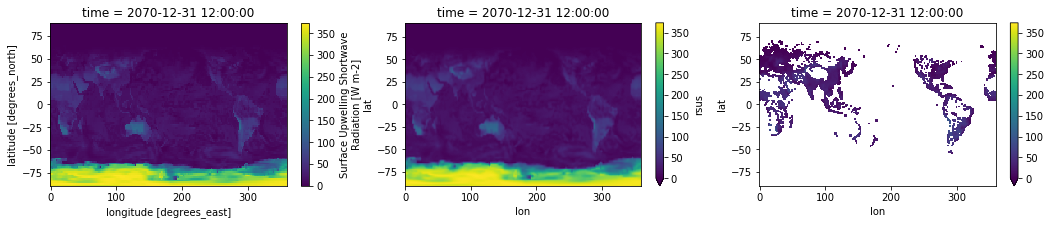

It takes elapsed_time 0.7321205139160156 to plot the layer
It takes elapsed_time 26.72765803337097 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2046, 2086, 20)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 29.500756978988647 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

275.1405186653137
